In [1]:
from envloader import TRAINING_DATA,VALIDATION_DATA,PREPROCESSED_DATA
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from util import  preprocess_image
from sklearn.model_selection import train_test_split

2024-08-23 17:38:44.022783: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 17:38:44.023341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 17:38:44.025941: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 17:38:44.033534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 17:38:44.049221: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

PREPROCESSING



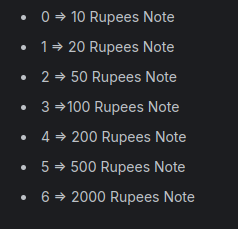

In [2]:
training_data=os.listdir(TRAINING_DATA)
#test_data=os.listdir(test_data)
#validation_data=os.listdir(validation_data)
print(training_data)

['20', '200', '50', '500', '100', '2000', '10']


In [ ]:
a = preprocess_image('/home/harshitha/study/ai/projects/currency_detector/dataset/training/10/0.jpg')
len(a)
a

In [ ]:
training_data = [] 
validation_data = []

labels = {
    0: "10",
    1: "20",
    2: "50",
    3: "100",
    4: "200",
    5: "500",
    6: "2000",
}
data = [TRAINING_DATA, VALIDATION_DATA]

for folder_name in range(7):
    for path in data:
        print(f'path :{path}\nfolder_name : {folder_name}')

        folder_path = os.path.join(path, labels[folder_name])
        paths = os.listdir(folder_path)
        for i in tqdm(range(0, len(paths))):
            filename = paths[i]
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(folder_path, filename)
                preprocessed_img = preprocess_image(image_path)

                if path == TRAINING_DATA:
                    training_data.append([preprocessed_img, labels[folder_name]])
                elif path == VALIDATION_DATA:
                    validation_data.append([preprocessed_img, labels[folder_name]])
                else:
                    print("Invalid path")

# --- Separate Images and Labels ---
X_train = np.array([data[0] for data in training_data])
y_train = np.array([data[1] for data in training_data])
X_val = np.array([data[0] for data in validation_data])
y_val = np.array([data[1] for data in validation_data])

# --- Save using NumPy's .npy format ---
np.save(f'{PREPROCESSED_DATA}/X_train.npy', X_train)
np.save(f'{PREPROCESSED_DATA}/y_train.npy', y_train)
np.save(f'{PREPROCESSED_DATA}/X_val.npy', X_val)
np.save(f'{PREPROCESSED_DATA}/y_val.npy', y_val)

MODEL

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
X_train = np.load(f'{PREPROCESSED_DATA}/X_train.npy')
y_train = np.load(f'{PREPROCESSED_DATA}/y_train.npy')
X_val = np.load(f'{PREPROCESSED_DATA}/X_val.npy')
y_val = np.load(f'{PREPROCESSED_DATA}/y_val.npy')

In [11]:
label_mapping = {
    "10": 0,
    "20": 1,
    "50": 2,
    "100": 3,
    "200": 4,
    "500": 5,
    "2000": 6 
}

# Convert string labels to integers
y_train_numerical = np.array([label_mapping[label] for label in y_train])
y_val_numerical = np.array([label_mapping[label] for label in y_val])

# Now, you can apply to_categorical
y_train = to_categorical(y_train_numerical, num_classes=7)
y_val = to_categorical(y_val_numerical, num_classes=7)

In [12]:
y_val[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [13]:
# --- 2. Build the CNN Model ---
IMG_WIDTH = 224
IMG_HEIGHT = 224
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(7, activation='softmax')) 

# --- 3. Compile the Model ---
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/home/harshitha/study/ai/projects/currency_detector/currency/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# --- 5. Train the Model ---
epochs = 20
 
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 814ms/step - accuracy: 0.8783 - loss: 0.3772 - val_accuracy: 0.9042 - val_loss: 0.3302
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 830ms/step - accuracy: 0.8850 - loss: 0.3593 - val_accuracy: 0.9102 - val_loss: 0.3087
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 863ms/step - accuracy: 0.9205 - loss: 0.2721 - val_accuracy: 0.9102 - val_loss: 0.2786
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 858ms/step - accuracy: 0.8933 - loss: 0.2967 - val_accuracy: 0.9281 - val_loss: 0.2847
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 847ms/step - accuracy: 0.9442 - loss: 0.1802 - val_accuracy: 0.9461 - val_loss: 0.2539
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 849ms/step - accuracy: 0.9386 - loss: 0.1621 - val_accuracy: 0.9521 - val_loss: 0.1949
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 888ms/step - accuracy: 0.9460 - loss: 0.1356 - val_accuracy: 0.9581 - val_loss: 0.2139
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 856ms/step - accuracy: 0.9381 - loss: 0.1793 - val_accu